In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
confirmed=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [3]:
confirmed_country = confirmed.iloc[:, 1:].groupby(['Country/Region']).sum().iloc[:, 2:].reset_index()
deaths_country = deaths.iloc[:, 1:].groupby(['Country/Region']).sum().iloc[:, 2:].reset_index()
recovered_country = recovered.iloc[:, 1:].groupby(['Country/Region']).sum().iloc[:, 2:].reset_index()

In [4]:
confirmed_country=confirmed_country.append(confirmed_country.iloc[:,1:].sum(axis=0), ignore_index=True)
deaths_country=deaths_country.append(deaths_country.iloc[:,1:].sum(axis=0), ignore_index=True)
recovered_country=recovered_country.append(recovered_country.iloc[:,1:].sum(axis=0), ignore_index=True)

In [5]:
countries=confirmed_country.iloc[:, 0].values
dates=confirmed_country.columns.values[1:]

In [6]:
daily_confirmed_country=confirmed_country
for i in range(len(dates)-1, 0, -1):
    daily_confirmed_country[dates[i]]=daily_confirmed_country[dates[i]]-daily_confirmed_country[dates[i-1]]

In [7]:
temp=daily_confirmed_country.iloc[-1,1:].values
step_size=10

In [32]:
t1=np.float32(daily_confirmed_country.iloc[-1,-10:].values/360934.0)
confirmed_model.predict(np.reshape(t1, (1, -1, 1)))[0][0]

0.8013166

In [8]:
x_confirmed=list()
y_confirmed=list()
for i in range(temp.shape[0]-step_size-1):
    x_confirmed.append(temp[i:i+step_size].reshape((step_size, 1)))
    y_confirmed.append(temp[i+step_size+1])
x_confirmed=np.float32(x_confirmed)/temp.max()
y_confirmed=np.float32(y_confirmed).reshape(-1, 1)/temp.max()

In [9]:
print(x_confirmed.shape)
print(x_confirmed.shape)

(239, 10, 1)
(239, 10, 1)


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.config.experimental import get_visible_devices, set_memory_growth
import matplotlib.pyplot as plt

In [11]:
gpus=get_visible_devices("GPU")
for gpu in gpus:
    set_memory_growth(gpu, True)

In [12]:
def model_defn():
    m=Sequential()
    m.add(LSTM(4, return_sequences=True, input_shape=(step_size, 1)))
    m.add(LSTM(8, return_sequences=False))
    m.add(Dense(1, activation='relu'))
    return m

In [13]:
confirmed_model=model_defn()
confirmed_model.compile(optimizer=Adam(learning_rate=0.0001), loss="mae", metrics=["mae", "mse"])

In [14]:
confirmed_history=confirmed_model.fit(x_confirmed, y_confirmed, epochs=20, batch_size=4, shuffle=True, validation_split=0.2)

Epoch 1/20
48/48 [==============================] - 1s 13ms/step - loss: 0.2561 - mae: 0.2561 - mse: 0.1099 - val_loss: 0.6532 - val_mae: 0.6532 - val_mse: 0.4351
Epoch 2/20
48/48 [==============================] - 0s 4ms/step - loss: 0.2301 - mae: 0.2301 - mse: 0.0894 - val_loss: 0.5992 - val_mae: 0.5992 - val_mse: 0.3673
Epoch 3/20
48/48 [==============================] - 0s 4ms/step - loss: 0.2044 - mae: 0.2044 - mse: 0.0709 - val_loss: 0.5376 - val_mae: 0.5376 - val_mse: 0.2973
Epoch 4/20
48/48 [==============================] - 0s 5ms/step - loss: 0.1762 - mae: 0.1762 - mse: 0.0529 - val_loss: 0.4679 - val_mae: 0.4679 - val_mse: 0.2272
Epoch 5/20
48/48 [==============================] - 0s 4ms/step - loss: 0.1451 - mae: 0.1451 - mse: 0.0375 - val_loss: 0.3891 - val_mae: 0.3891 - val_mse: 0.1596
Epoch 6/20
48/48 [==============================] - 0s 5ms/step - loss: 0.1192 - mae: 0.1192 - mse: 0.0255 - val_loss: 0.3197 - val_mae: 0.3197 - val_mse: 0.1104
Epoch 7/20
48/48 [=========

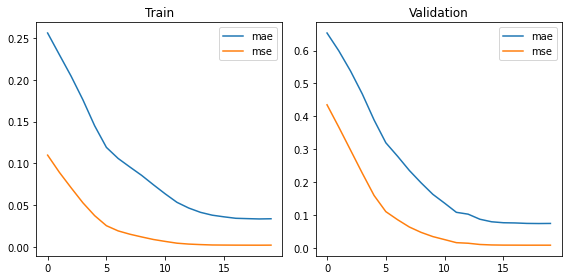

In [15]:
fig=plt.figure(figsize=(8, 4))
ax1=fig.add_subplot(121)
ax1.plot(confirmed_history.history["mae"], label="mae")
ax1.plot(confirmed_history.history["mse"], label="mse")
ax1.set_title("Train")
ax1.legend()
ax2=fig.add_subplot(122)
ax2.plot(confirmed_history.history["val_mae"], label="mae")
ax2.plot(confirmed_history.history["val_mse"], label="mse")
ax2.set_title("Validation")
ax2.legend()
plt.tight_layout()
plt.show()

In [17]:
confirmed_model.save("model/world_model.h5")